## 0. 필요한 라이브러리 import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 살펴보기
pandas의 read_csv 함수를 사용해 데이터를 읽어오고, 연도별 어떤 변수들이 있는지 살펴보겠습니다.

In [2]:
df_2015 = pd.read_csv('Data/2015.csv')
print('2015', df_2015)
print()
df_2016 = pd.read_csv('Data/2016.csv')
print('2016', df_2016)
print()
df_2017 = pd.read_csv('Data/2017.csv')
print('2017', df_2017)
print()
df_2018 = pd.read_csv('Data/2018.csv')
print('2018', df_2018)
print()
df_2019 = pd.read_csv('Data/2019.csv')
print('2019', df_2019)
print()

2015          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7

## 2. Data 전처리 
### Features 정리
연도별 Data간 Feature의 종류, 개수 및 이름이 다르므로 정리

In [3]:
# 은애님 code 적용

2015, 2016년도 자료에 있는 Region이 2017, 2018, 2019년도에 없어 추가

In [4]:
# 2018, 2019년도 "Country or region"을 "Country"로 변경
df_2018.rename(columns = {"Country or region" : "Country"}, inplace=True)
df_2019.rename(columns = {"Country or region" : "Country"}, inplace=True)

# 2017, 2018, 2019년도에 "Region" column 추가
df_2017.insert(1, 'Region', '-')
df_2018.insert(1, 'Region', '-')
df_2019.insert(1, 'Region', '-')

각 Country별 2015 또는 2016년도에서 Region을 읽어와서 2017, 2018, 2019년도 Region에 입력

In [5]:
# 2015, 2016년도의 Country및 Region을 Dictionary로 만든다.
region_2015 = {}
region_2016 = {}
for i in range(len(df_2015)):
    region_2015[df_2015['Country'][i]] = df_2015['Region'][i]
for i in range(len(df_2016)):
    region_2016[df_2016['Country'][i]] = df_2016['Region'][i]

# region_2015와 region_2016의 합집합을 구하여 region_2015_2016을 만든다.
region_2015_2016 = region_2015 | region_2016

# 2017, 2018, 2019년도 Region data update
for i in range(len(df_2017)):
    if df_2017['Country'][i] in region_2015_2016:
        df_2017['Region'][i] = region_2015_2016[df_2017['Country'][i]]

for i in range(len(df_2018)):
    if df_2018['Country'][i] in region_2015_2016:
        df_2018['Region'][i] = region_2015_2016[df_2018['Country'][i]]

for i in range(len(df_2019)):
    if df_2019['Country'][i] in region_2015_2016:
        df_2019['Region'][i] = region_2015_2016[df_2019['Country'][i]]

print('2015', df_2015)
print('2016', df_2016)
print('2017', df_2017)
print('2018', df_2018)
print('2019', df_2019)

df_2017.to_csv('2017_with_regions.csv', index=False)
df_2018.to_csv('2018_with_regions.csv', index=False)
df_2019.to_csv('2019_with_regions.csv', index=False)

2015          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7

### 결측치 확인
먼저 데이터에 결측치가 있는지를 확인하겠습니다.<br>
missingno 라이브러리의 matrix 함수를 사용하면, 데이터의 결측 상태를 시각화를 통해 살펴볼 수 있습니다.

In [6]:
df_2019.head()

,Overall rank,Region,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Western Europe,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Western Europe,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Western Europe,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Western Europe,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Western Europe,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<AxesSubplot:>

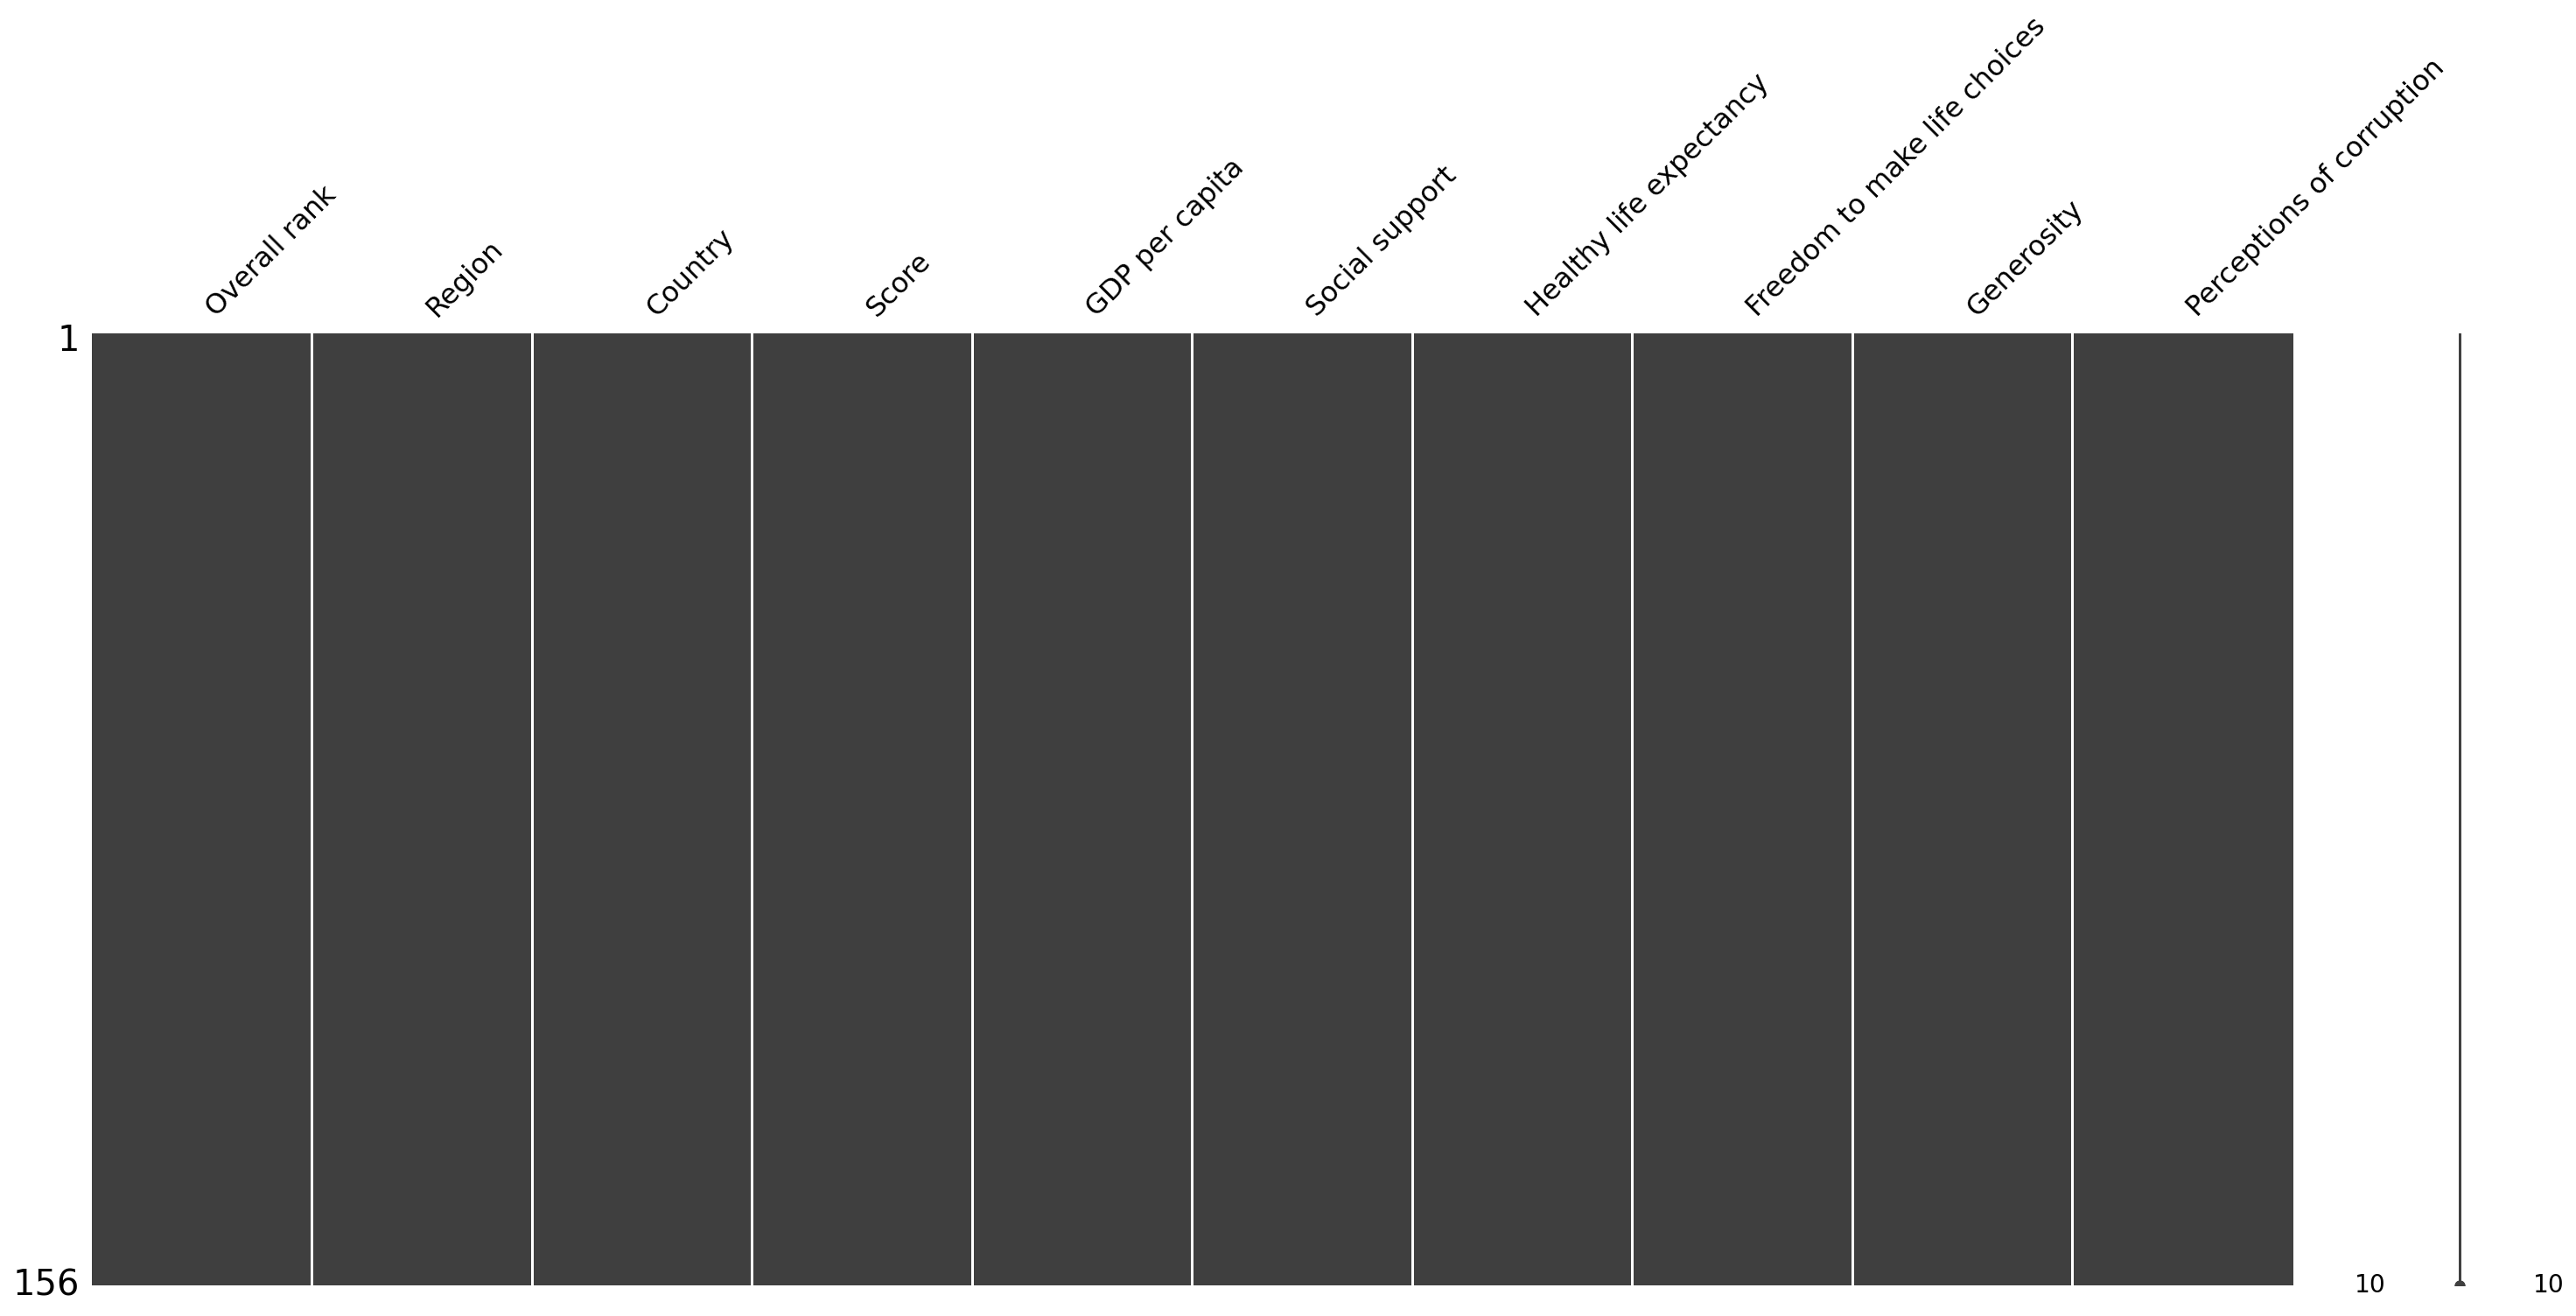

In [7]:
msno.matrix(df_2019)

모든 변수에 결측치가 없는 것으로 보이지만, 혹시 모르니 확실하게 살펴보겠습니다.<br>

In [8]:
for c in df_2019.columns:
    print('{} : {}'.format(c, len(df_2019.loc[pd.isnull(df_2019[c]), c].values)))

Overall rank : 0
Region : 0
Country : 0
Score : 0
GDP per capita : 0
Social support : 0
Healthy life expectancy : 0
Freedom to make life choices : 0
Generosity : 0
Perceptions of corruption : 0


### Overall Rank column 정리
Overall Rank column은 Score colume과 같은의미이므로 제거

In [9]:
sub_id = df_2019['Overall rank'][len(df_2019):]
del df_2019['Overall rank']

In [10]:
df_2019.head()

,Region,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Western Europe,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Western Europe,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Western Europe,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Western Europe,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Western Europe,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 각 요소들의 행복지수에 대한 상관관계 시각화
각 요소들이 행복지수에 얼마나 영향을 미치는지 시각화하여 확인

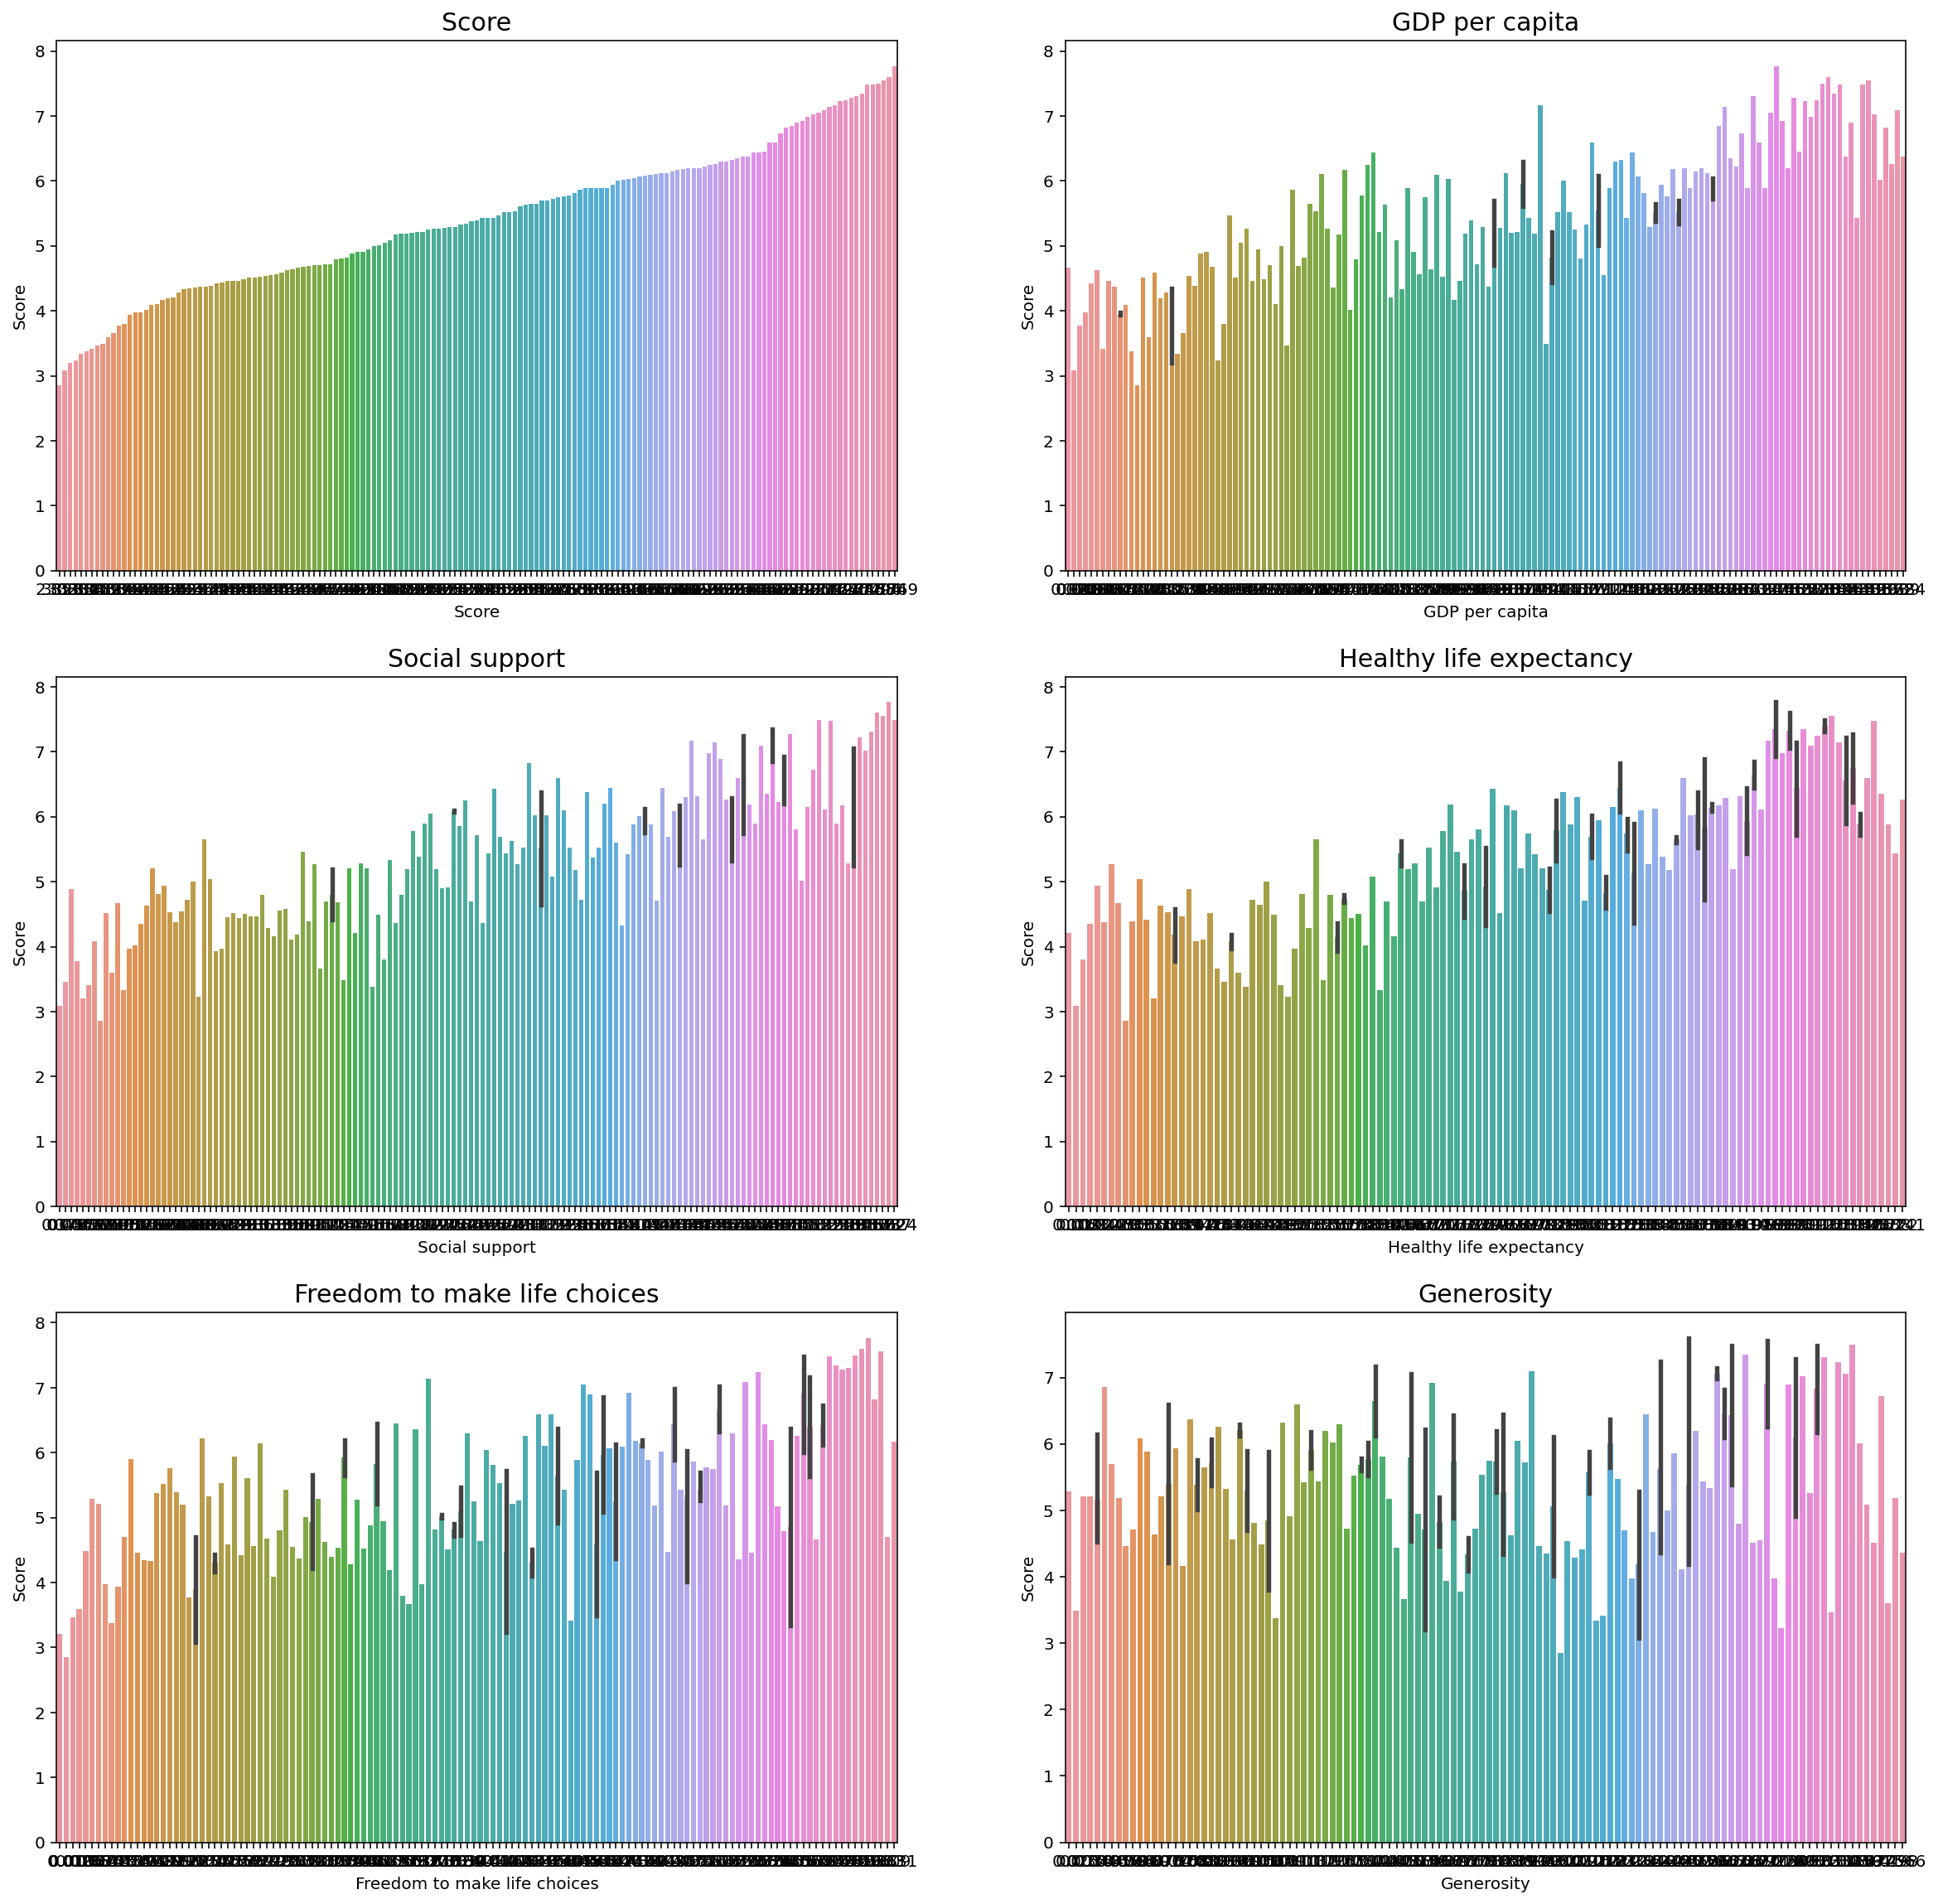

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Country 변수는 제외하고 시각화합니다.
count = 2
columns = df_2019.columns
for row in range(3):
    for col in range(2):
        if count == 8:
            break
        sns.barplot(data=df_2019, x=columns[count], y='Score', ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1


GDP per capita,	Social support,	Healthy life expectancy, Freedom to make life choices는 값이 증가함에 따라 행복도도 올라가는 경향을 보이나 Generosity와 Perceptions of corruption의 경우 큰 상관관계가 없어보인다.

### 각 Region별 행복지수 비교 시각화

In [12]:
# 우선 지역구분및 지역별 국가수 확인
df_Region = df_2019.groupby('Region').size()
print(df_Region)

Region
-                                   4
Australia and New Zealand           2
Central and Eastern Europe         28
Eastern Asia                        6
Latin America and Caribbean        20
Middle East and Northern Africa    19
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 39
Western Europe                     20
dtype: int64


In [13]:
# Region이 확인되지 않은 국가 확인
for i in range(len(df_2019)):
    if df_2019['Region'][i] == '-':
        print(df_2019['Country'][i])

Trinidad & Tobago
Northern Cyprus
North Macedonia
Gambia


In [14]:
# Region이 확인되지 않은 국가의 Region을 수동으로 입력
for i in range(len(df_2019)):
    if df_2019['Country'][i] == 'Trinidad & Tobago':
        df_2019['Region'][i] = 'Latin America and Caribbean'
    elif df_2019['Country'][i] == 'Northern Cyprus':
        df_2019['Region'][i] = 'Central and Eastern Europe'
    elif df_2019['Country'][i] == 'North Macedonia':
        df_2019['Region'][i] = 'Central and Eastern Europe'
    elif df_2019['Country'][i] == 'Gambia':
        df_2019['Region'][i] = 'Sub-Saharan Africa'

In [15]:
# 지역구분및 지역별 국가수 다시 확인
df_Region = df_2019.groupby('Region').size()
df_Region = df_Region.to_frame().reset_index()
df_Region.columns = ['Region', 'count']
print(df_Region)

                            Region  count
0        Australia and New Zealand      2
1       Central and Eastern Europe     30
2                     Eastern Asia      6
3      Latin America and Caribbean     21
4  Middle East and Northern Africa     19
5                    North America      2
6                Southeastern Asia      9
7                    Southern Asia      7
8               Sub-Saharan Africa     40
9                   Western Europe     20


[Text(0, 0, 'Western Europe'),
 Text(1, 0, 'Australia and New Zealand'),
 Text(2, 0, 'North America'),
 Text(3, 0, 'Latin America and Caribbean'),
 Text(4, 0, 'Middle East and Northern Africa'),
 Text(5, 0, 'Central and Eastern Europe'),
 Text(6, 0, 'Eastern Asia'),
 Text(7, 0, 'Southeastern Asia'),
 Text(8, 0, 'Sub-Saharan Africa'),
 Text(9, 0, 'Southern Asia')]

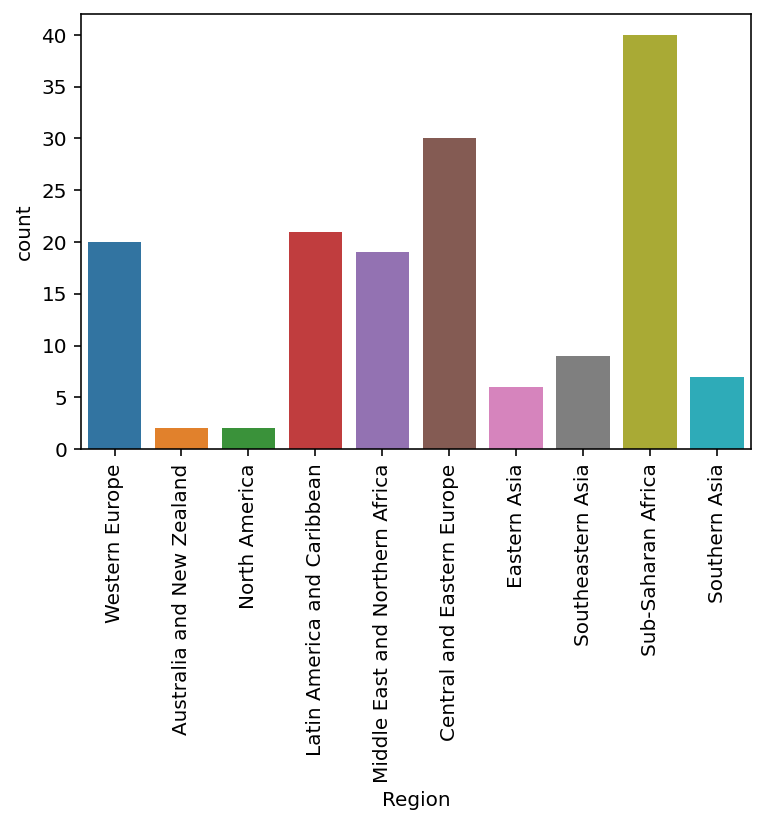

In [16]:
# Region별 국가수 시각화
ax = sns.countplot(x='Region', data=df_2019)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### 각 Region별 행복지수 시각화

In [17]:
# df_Region에 Score_Sum column 추가
df_Region.insert(2, 'Score_Sum', 0.0)
df_Region.insert(3, 'Score_Avg', 0.0)
print(df_Region)

                            Region  count  Score_Sum  Score_Avg
0        Australia and New Zealand      2        0.0        0.0
1       Central and Eastern Europe     30        0.0        0.0
2                     Eastern Asia      6        0.0        0.0
3      Latin America and Caribbean     21        0.0        0.0
4  Middle East and Northern Africa     19        0.0        0.0
5                    North America      2        0.0        0.0
6                Southeastern Asia      9        0.0        0.0
7                    Southern Asia      7        0.0        0.0
8               Sub-Saharan Africa     40        0.0        0.0
9                   Western Europe     20        0.0        0.0


                            Region  count  Score_Sum  Score_Avg
0        Australia and New Zealand      2     14.535   7.267500
1       Central and Eastern Europe     30    167.002   5.566733
2                     Eastern Asia      6     34.133   5.688833
3      Latin America and Caribbean     21    125.043   5.954429
4  Middle East and Northern Africa     19     99.503   5.237000
5                    North America      2     14.170   7.085000
6                Southeastern Asia      9     47.463   5.273667
7                    Southern Asia      7     31.688   4.526857
8               Sub-Saharan Africa     40    172.002   4.300050
9                   Western Europe     20    137.968   6.898400


[Text(0, 0, 'Australia and New Zealand'),
 Text(1, 0, 'Central and Eastern Europe'),
 Text(2, 0, 'Eastern Asia'),
 Text(3, 0, 'Latin America and Caribbean'),
 Text(4, 0, 'Middle East and Northern Africa'),
 Text(5, 0, 'North America'),
 Text(6, 0, 'Southeastern Asia'),
 Text(7, 0, 'Southern Asia'),
 Text(8, 0, 'Sub-Saharan Africa'),
 Text(9, 0, 'Western Europe')]

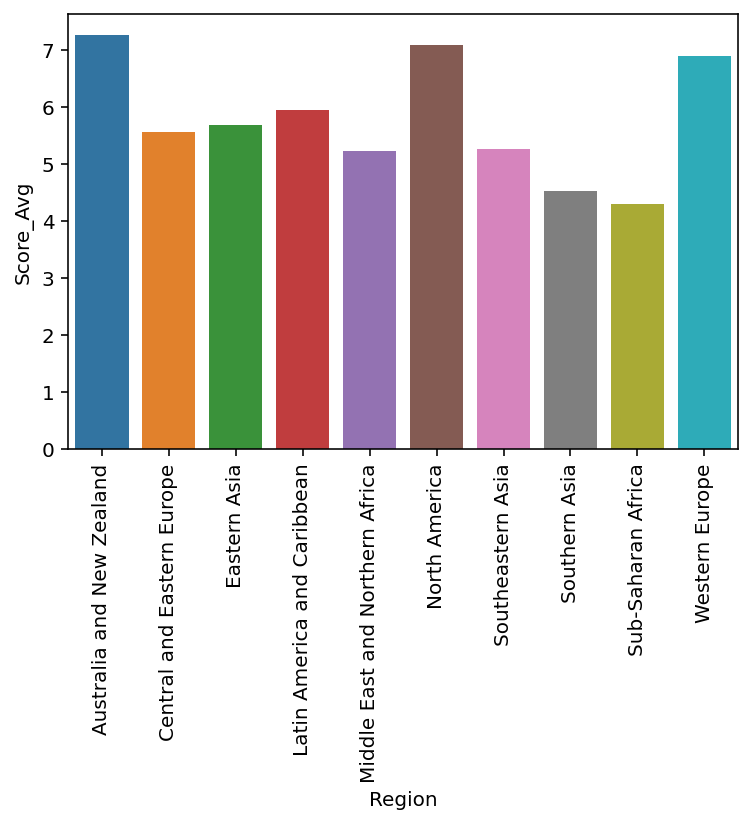

In [18]:
# 각 Region별 행복지수 평균값 구하기
for i in range(len(df_2019)):
    for k in range(len(df_Region)):
        if df_2019['Region'][i] == df_Region['Region'][k]:
            df_Region['Score_Sum'][k] += df_2019['Score'][i]

for i in range(len(df_Region)):
    df_Region['Score_Avg'][i] = df_Region['Score_Sum'][i] / df_Region['count'][i]

print(df_Region)

ax = sns.barplot(data=df_Region, x='Region', y='Score_Avg')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)